<font face = "Verdana" size ="5">The coronavirus family causes illnesses ranging from the common cold to more severe diseases such as severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS).COVID-19 is thought to have originated in a seafood market where wildlife was sold illegally.The WHO declared the virus a pandemic on March 11 and said it was "deeply concerned by the alarming levels of spread and severity" of the outbreak.Scientists have pointed to either bats or snakes as possible sources. This notebook aims at exploring COVID-19 through data analysis and future predictions.
 
   <br><br>Data is provided by <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>
   <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>WHO</a>
   <br>Learn more from the <a href='https://www.cdc.gov/coronavirus/2019-ncov'>CDC</a>
   <br><br>
   

   <font face = "Verdana" size ="1">
    <center><img src='https://cdn.pixabay.com/photo/2020/03/08/23/24/coronavirus-4914028_1280.jpg'>
     Source: https://cdn.pixabay.com/photo/2020/03/08/23/24/coronavirus-4914028_1280.jpg </center> 
    </font>
  
<font face = "Verdana" size ="4">TRANSMISSION OF CORONA VIRUS:</font><br>
    <font face = "Verdana" size ="3">Corona virus are mostly spread from infected person through talks, cough, sneezes (discharge of saliva drops) and also from hand shake with infected person.</font><br><br><br>

<font face = "Verdana" size ="4">Timeline of corona virus:</font><br><br>
<center><img src='https://www.aljazeera.com/mritems/Images/2020/2/18/873f6d3adc494c398fab85d9d4c92bf7_18.jpg' width="600" height="600"></center><br><br>
  
    
      
<font face = "Verdana" size ="4">SYMPTOMS OF CORONAVIRUS</font><br>
<font size ="3">
<li>Fever</li>
<li>Dry cough</li>
<li>Sore throat</li>
<li>Nasal mobbing</li>    
</font><br><br>
    
<font face = "Verdana" size ="1">
    <center><img src='https://cdn.pixabay.com/photo/2020/04/16/04/54/quarantine-5049106_1280.png' width="400" height="400">
     Source: https://cdn.pixabay.com/photo/2020/04/16/04/54/quarantine-5049106_1280.png </center> 
    </font>   
        
    
    
<font face = "Verdana" size ="5"><B><I> Keep strong, world! Stay safe and healthy.</I></B> </font>




In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime
import operator 
plt.style.use('fivethirtyeight')


import plotly.graph_objects as go

import pycountry
import plotly.express as px



In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-16-2020.csv')



In [17]:
#confirmed_df.head()

In [34]:
india_specific = confirmed_df[confirmed_df['Country/Region']=="India"]
#india_specific

In [19]:
#deaths_df.head()

In [20]:
#recoveries_df.head()

In [21]:
#latest_data.head()

In [22]:
cols = confirmed_df.keys()

In [35]:
#getting the dates
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
india_dates = india_specific.loc[:,cols[4]:cols[-1]]



In [36]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
india_new = []

china_cases = [] 
italy_cases = []
us_cases = [] 
brazil_cases = []
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
brazil_deaths = [] 
india_deaths = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
brazil_recoveries = [] 
india_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    india_sum = india_dates[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    india_new.append(india_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    brazil_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Brazil'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())


In [37]:
#daily increase

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
brazil_daily_increase = daily_increase(brazil_cases)
india_daily_increase = daily_increase(india_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
brazil_daily_death = daily_increase(brazil_deaths)
india_daily_death = daily_increase(india_deaths)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
brazil_daily_recovery = daily_increase(brazil_recoveries)
india_daily_recovery = daily_increase(india_recoveries)


In [38]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
india_new = np.array(india_new).reshape(-1, 1)


In [39]:
#futue

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [40]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

#  World Graph with cases:

In [3]:
new_graph = confirmed_df[["Province/State","Lat","Long","Country/Region"]]
new_graph.rename(columns={'Country/Region':'Country_Region'}, inplace=True)
new_graph.rename(columns={'Province/State	':'Province_State	'}, inplace=True)
df_temp = latest_data.copy()
df_temp['Country_Region'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, new_graph, on=["Country_Region"])



c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [4]:

fig = px.density_mapbox(df_latlong, 
                        lat="Lat_x", 
                        lon="Long_", 
                        hover_name="Country_Region", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Last_Update",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()


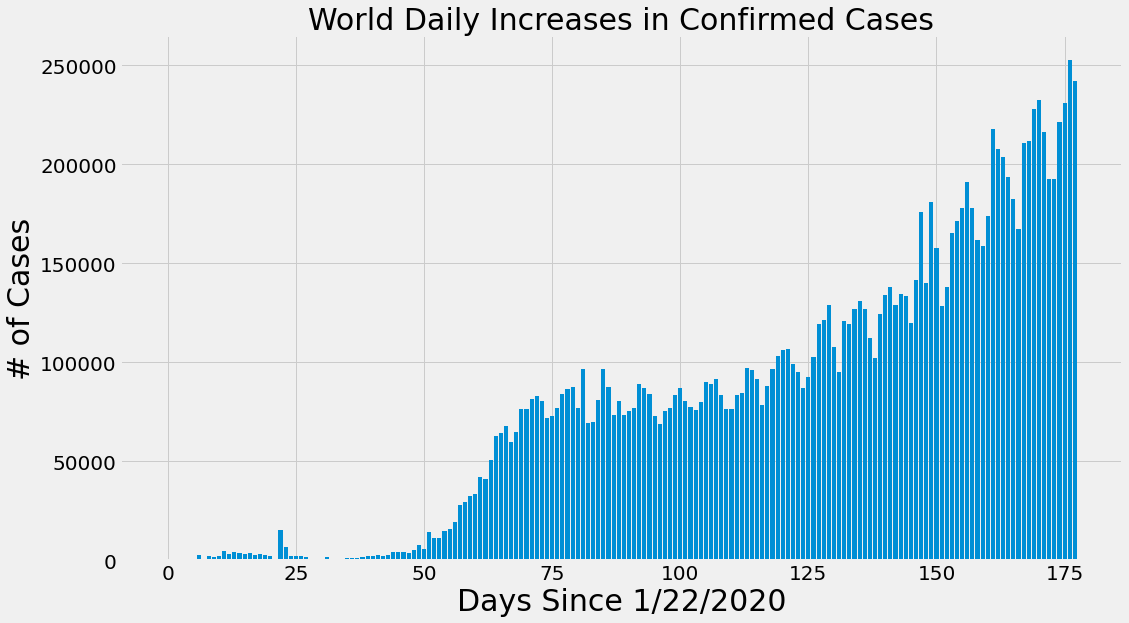

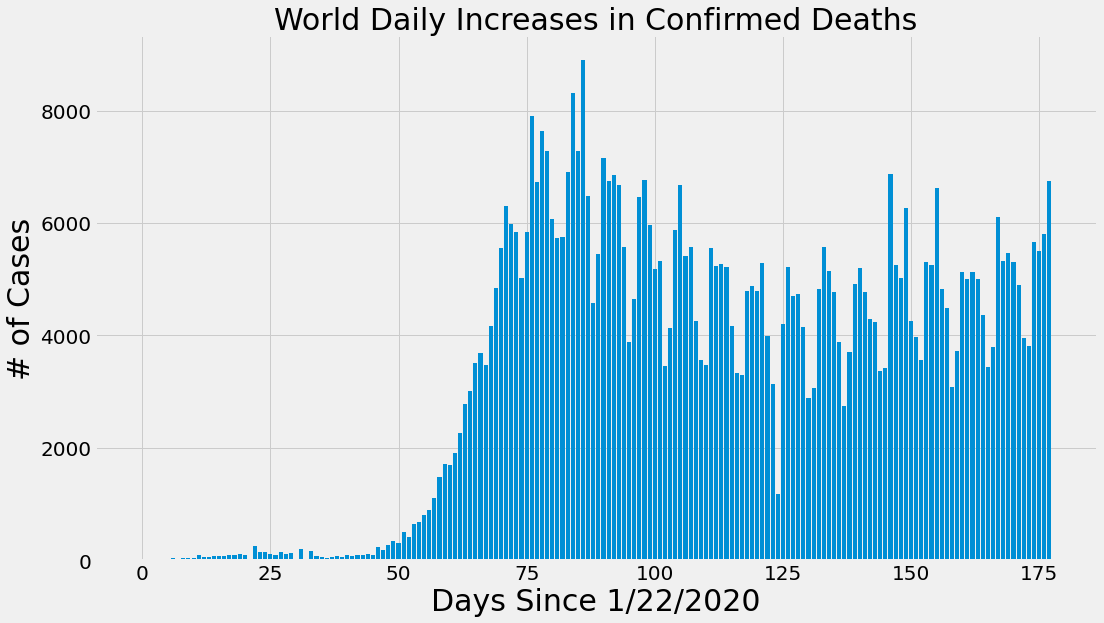

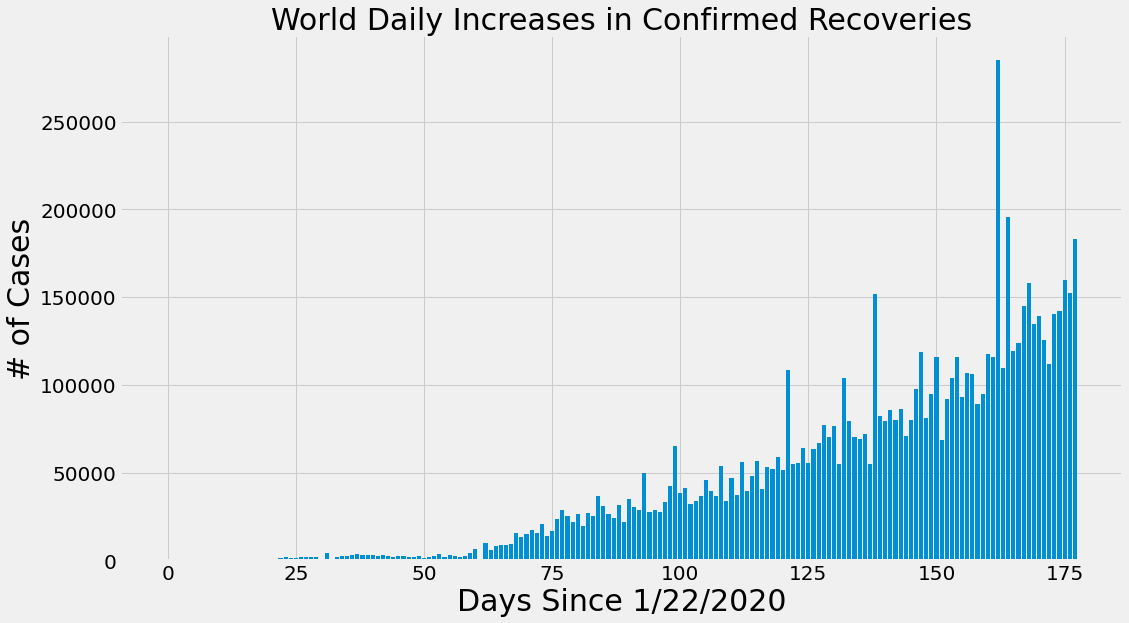

In [43]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [44]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#  Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate
 <a id='world_wide_graphs'></a>

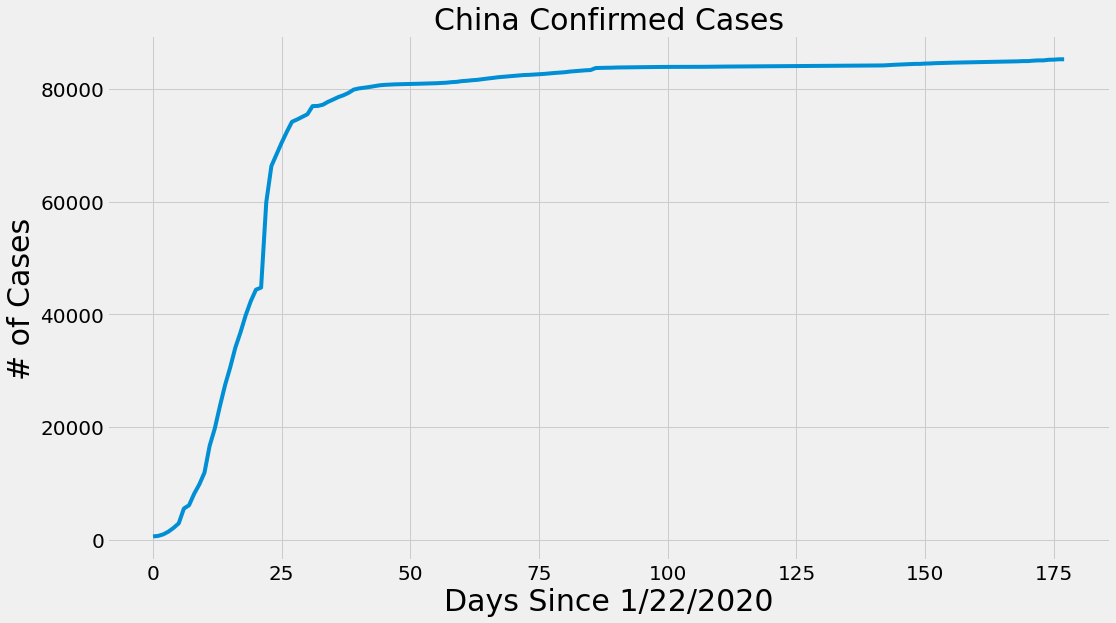

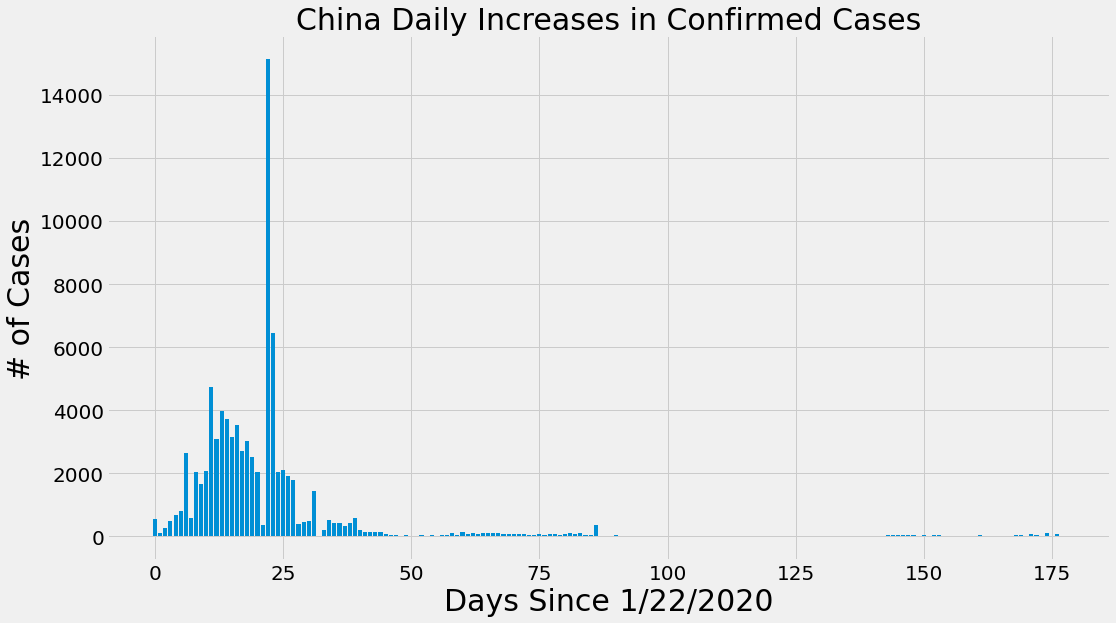

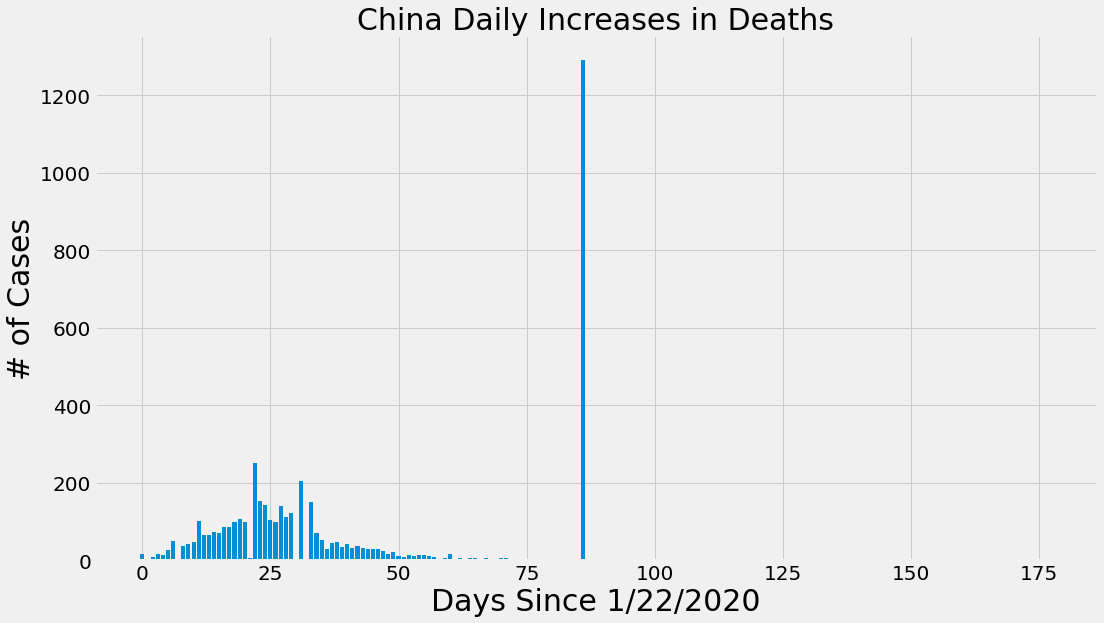

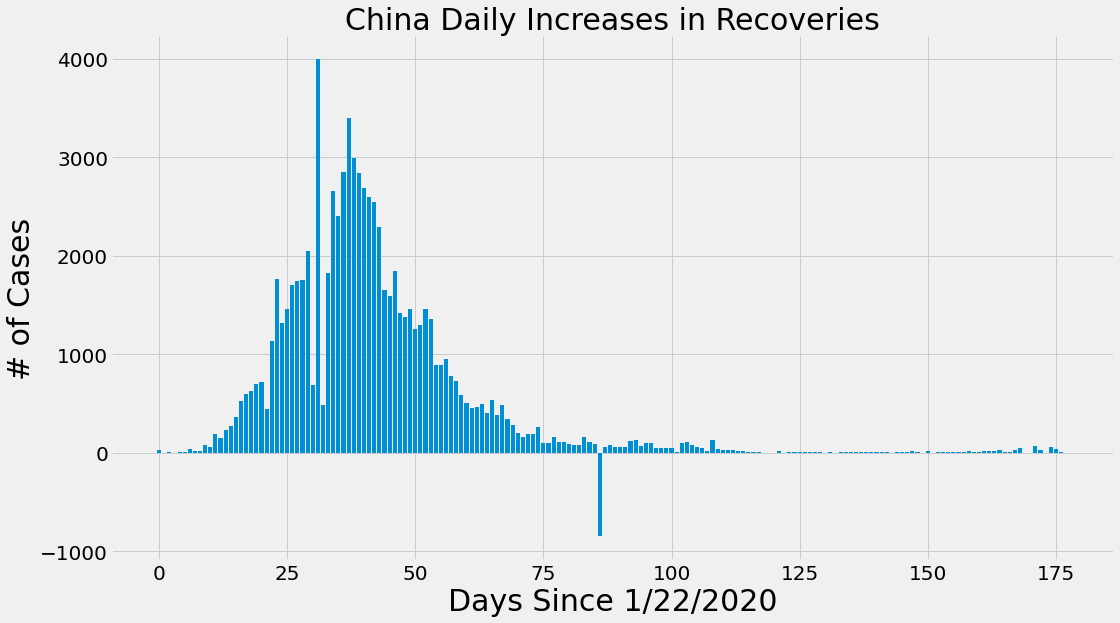

In [45]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

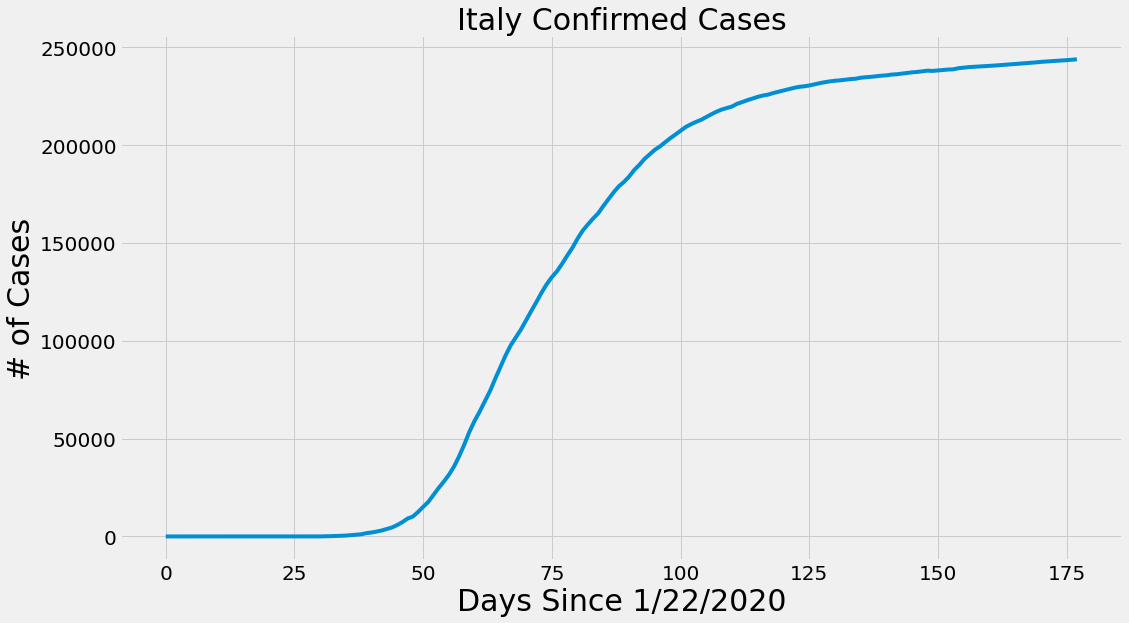

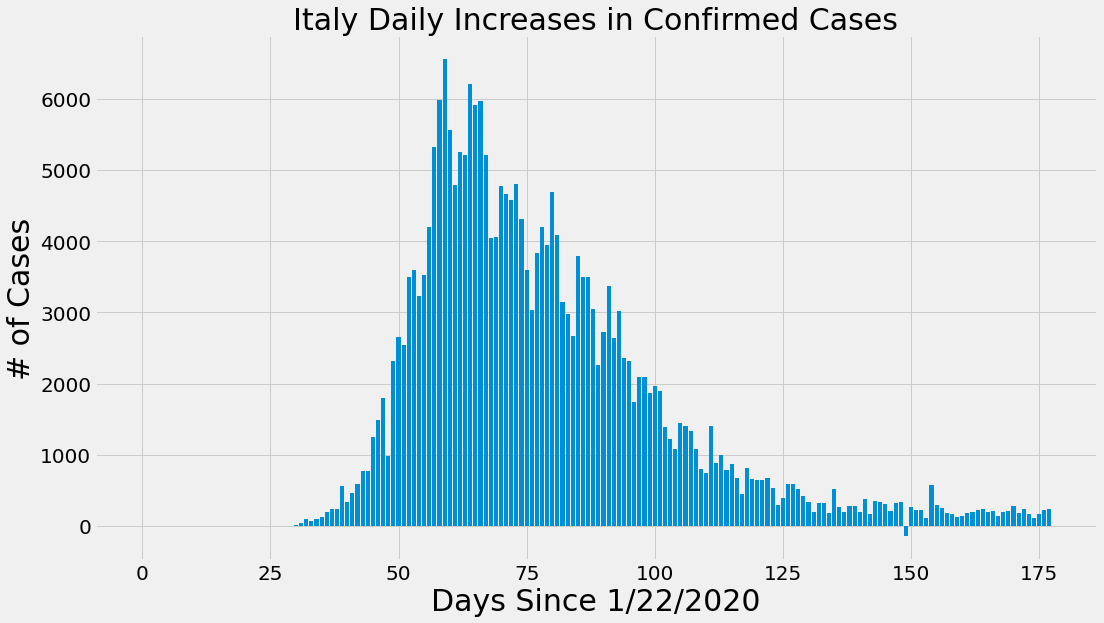

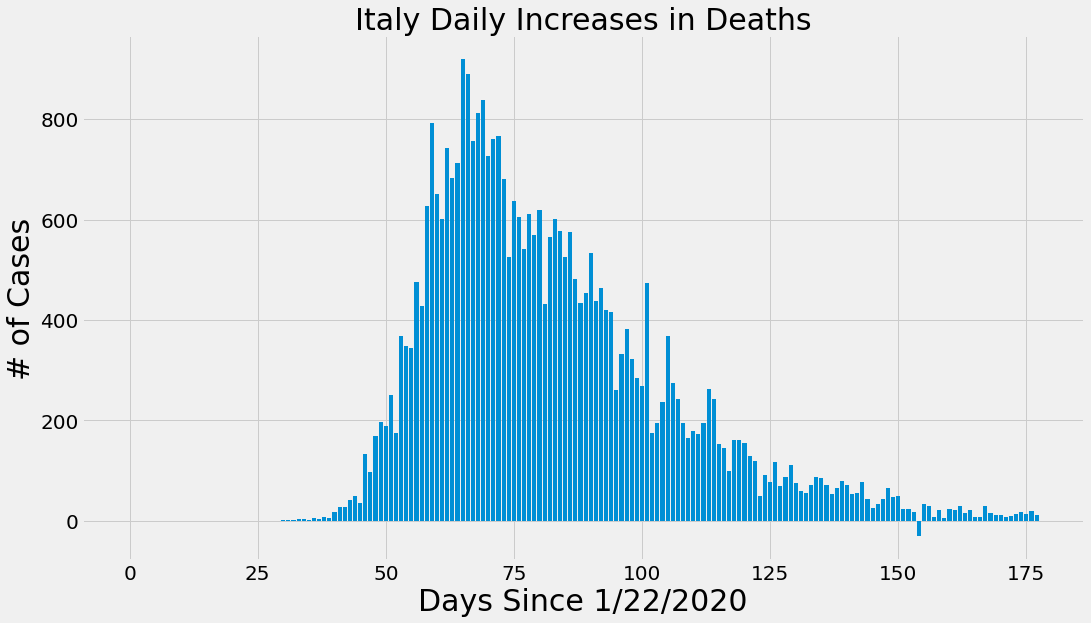

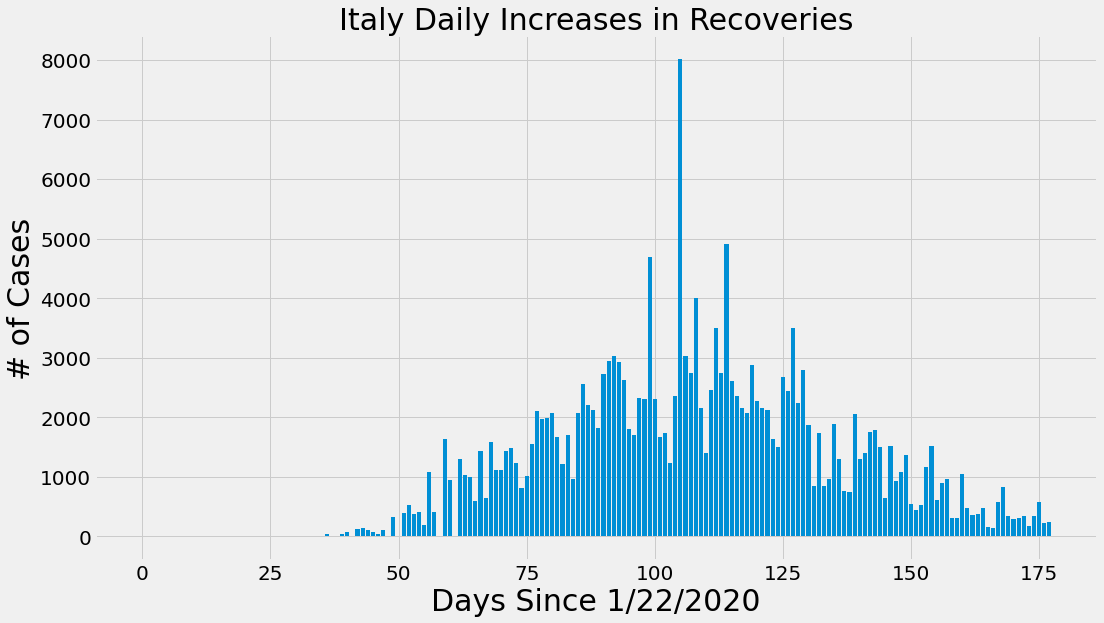

In [46]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

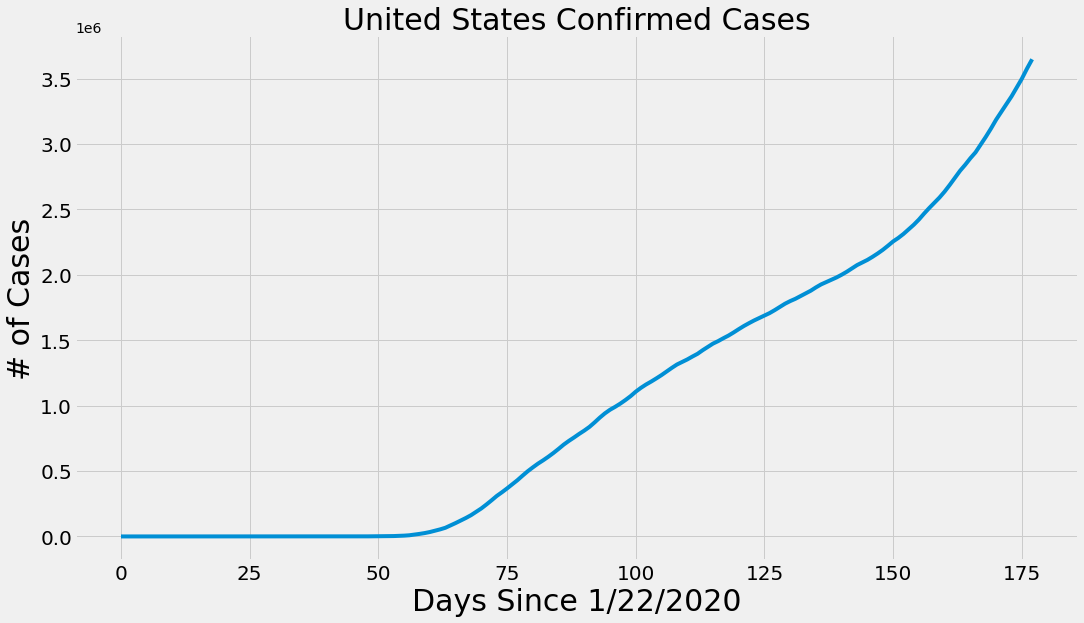

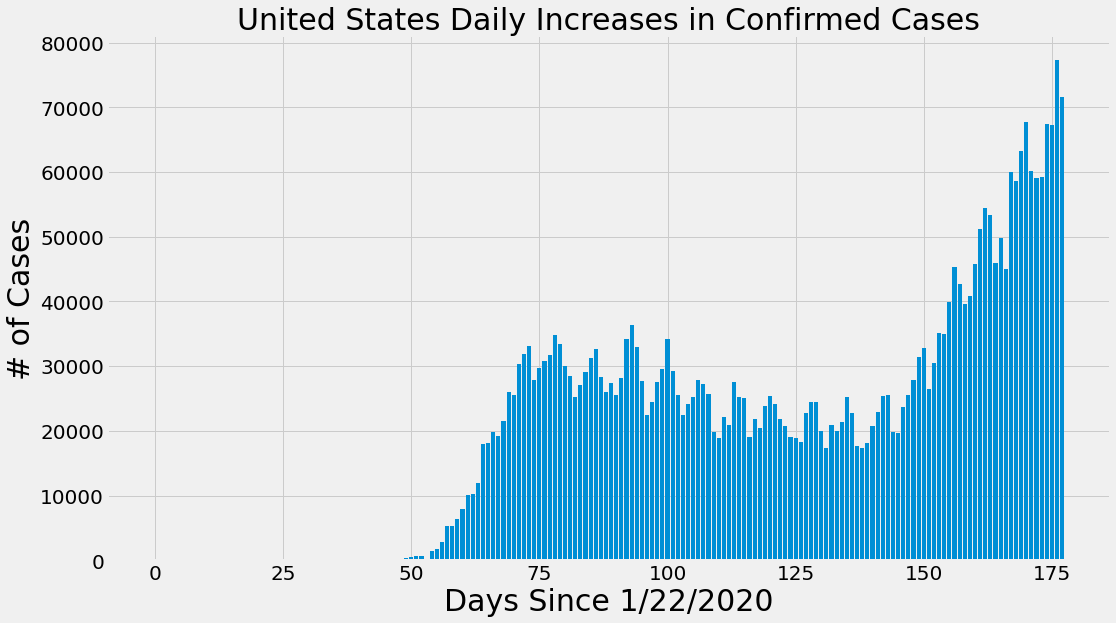

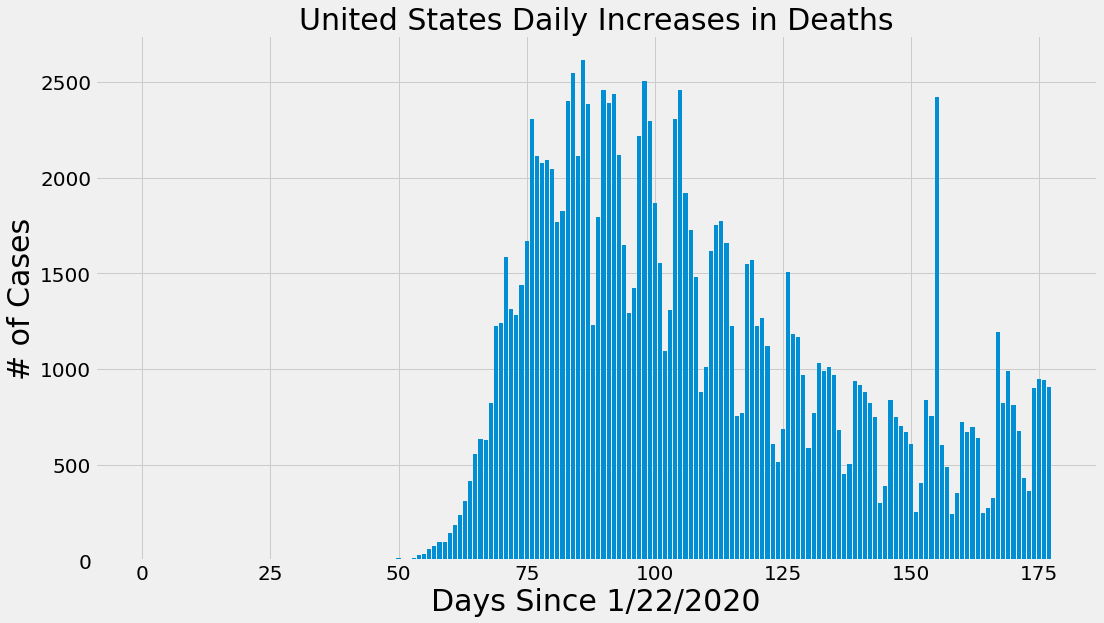

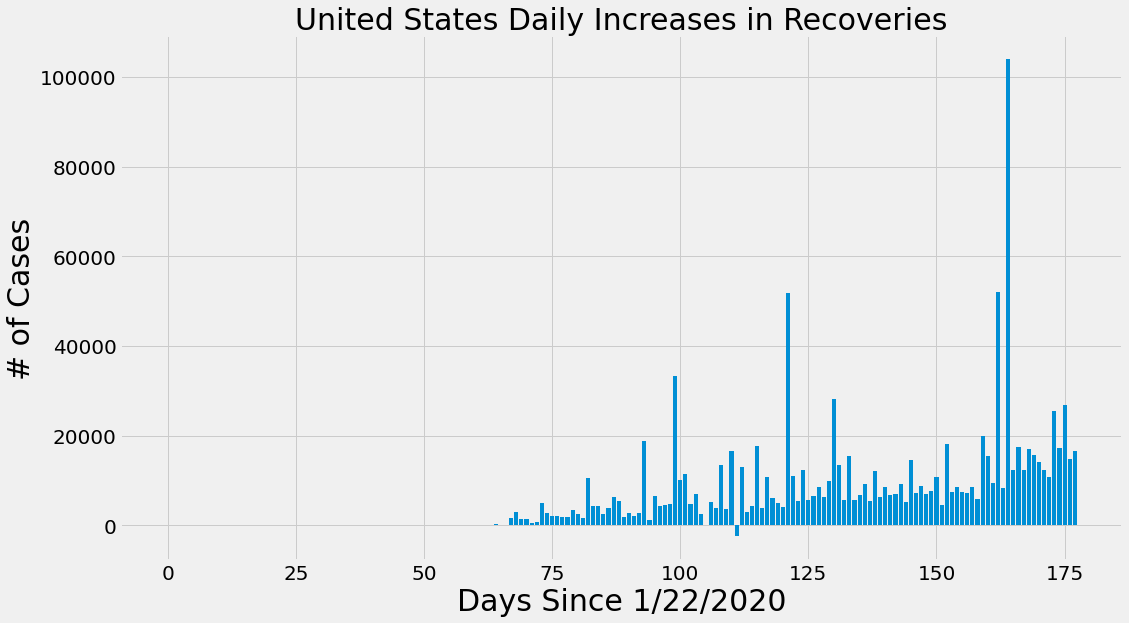

In [47]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

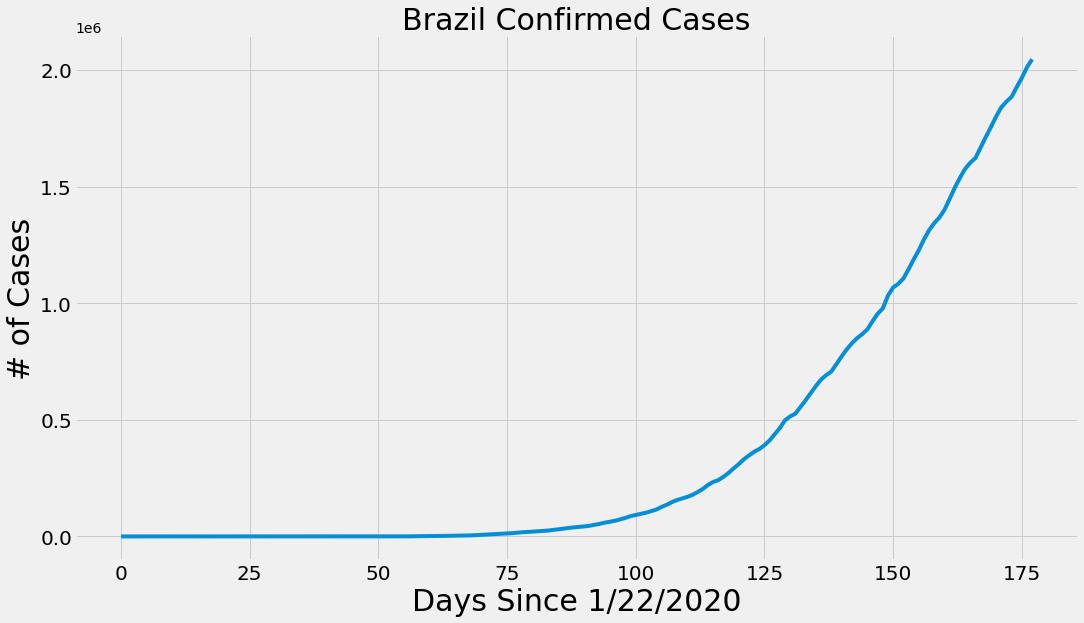

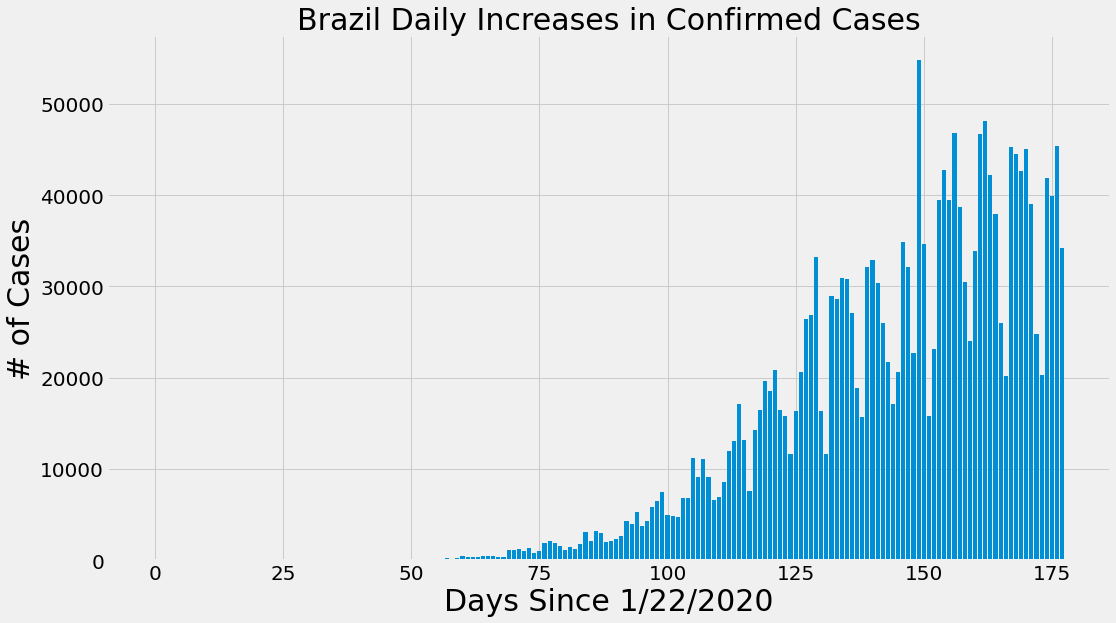

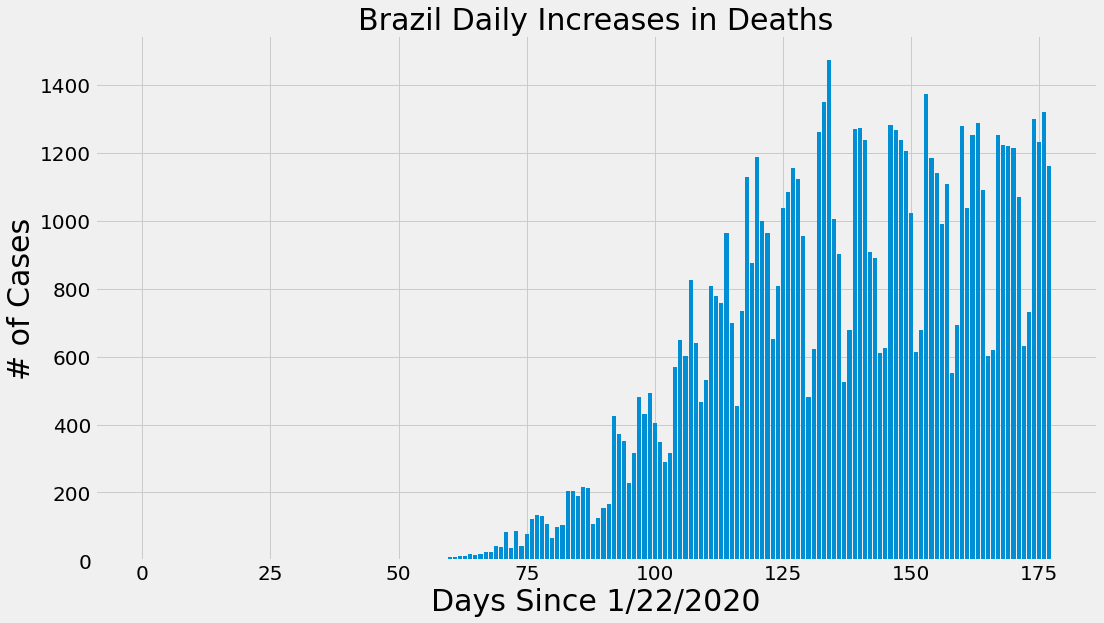

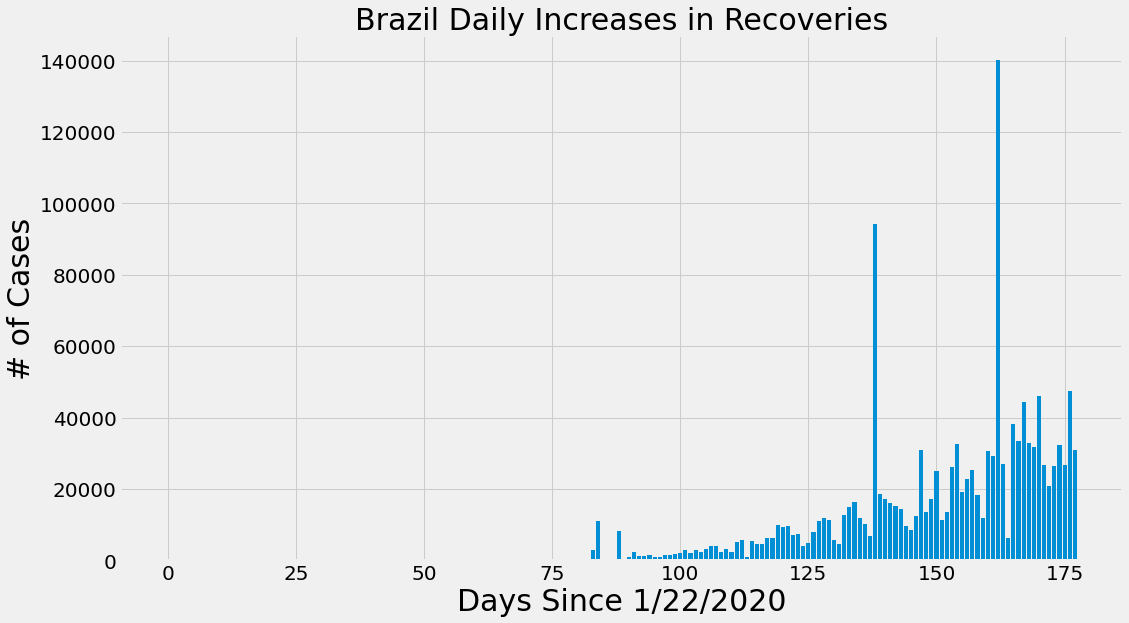

In [48]:
country_plot(adjusted_dates, brazil_cases, brazil_daily_increase, brazil_daily_death, brazil_daily_recovery, 'Brazil')

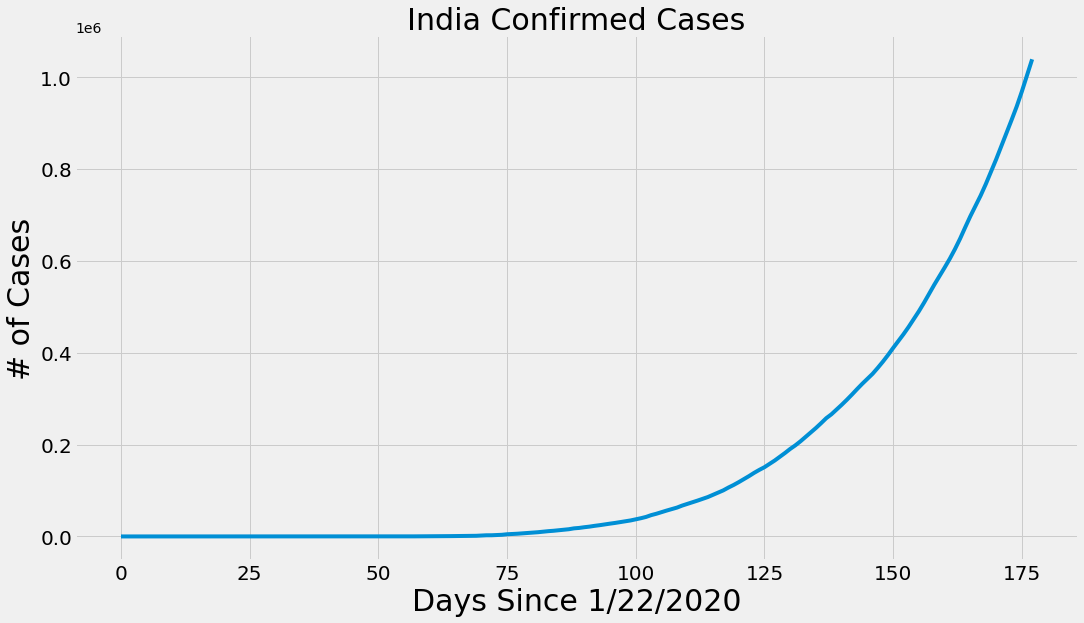

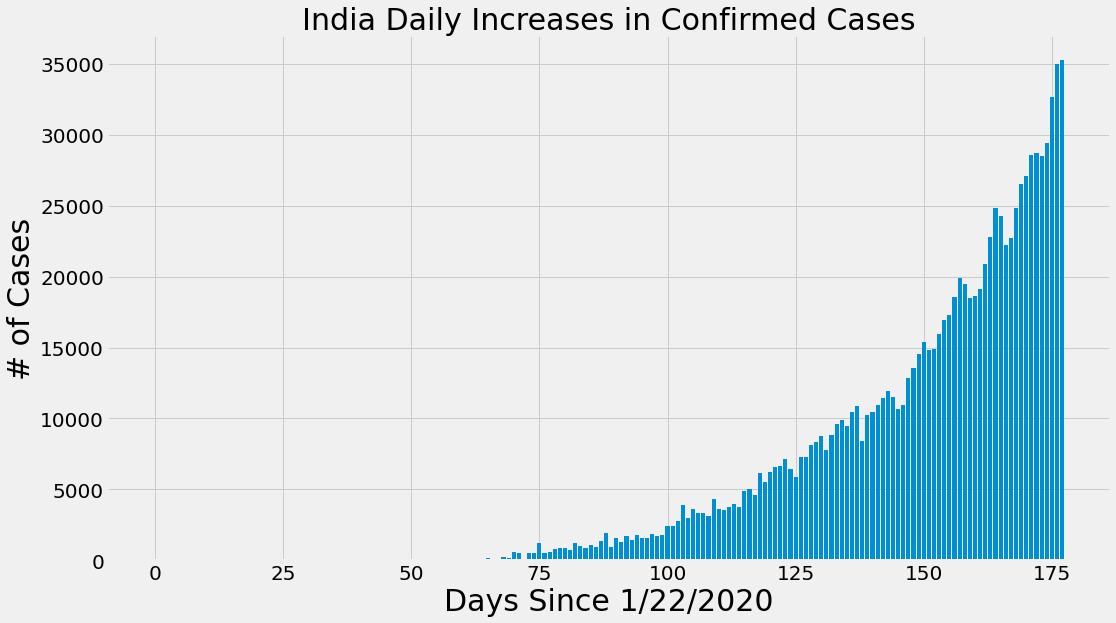

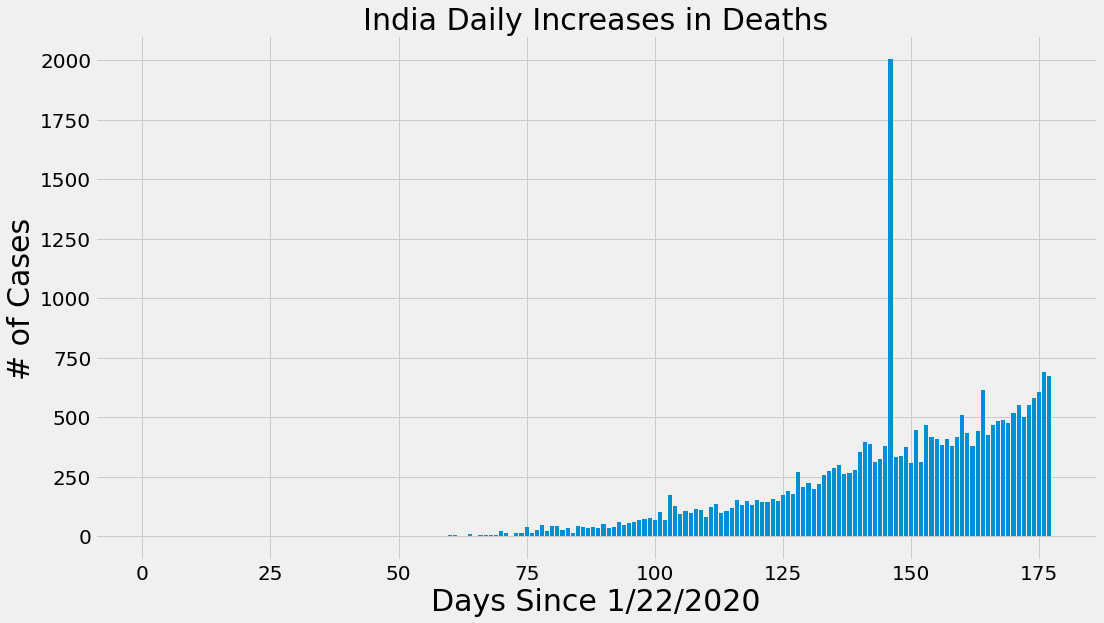

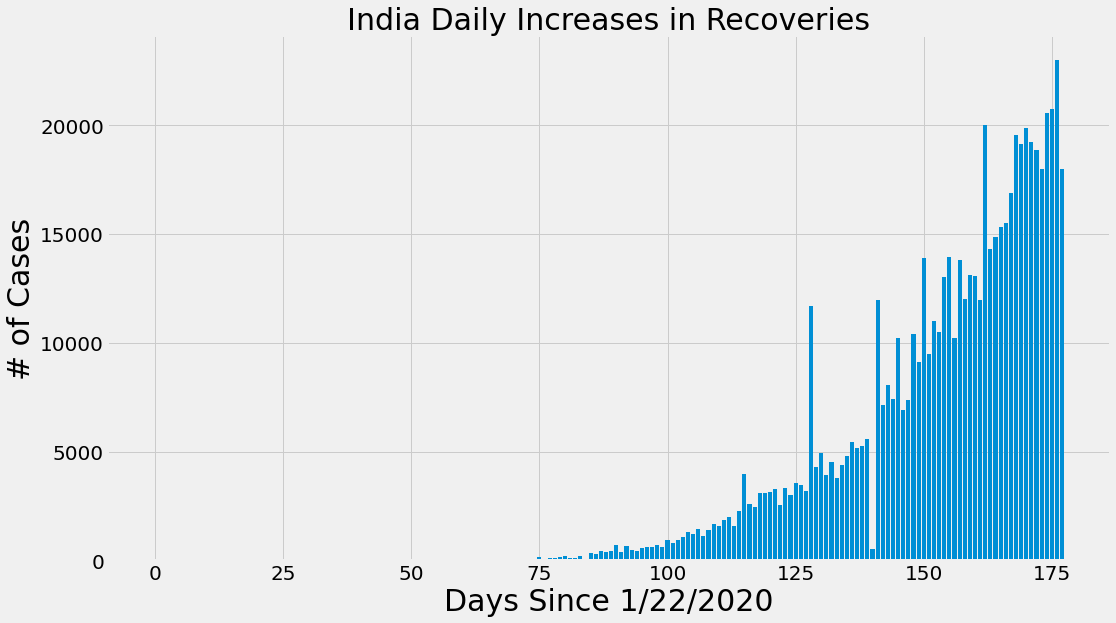

In [49]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

#  Comparision of Top 5 affected countries
 <a id='world_wide_graphs'></a>

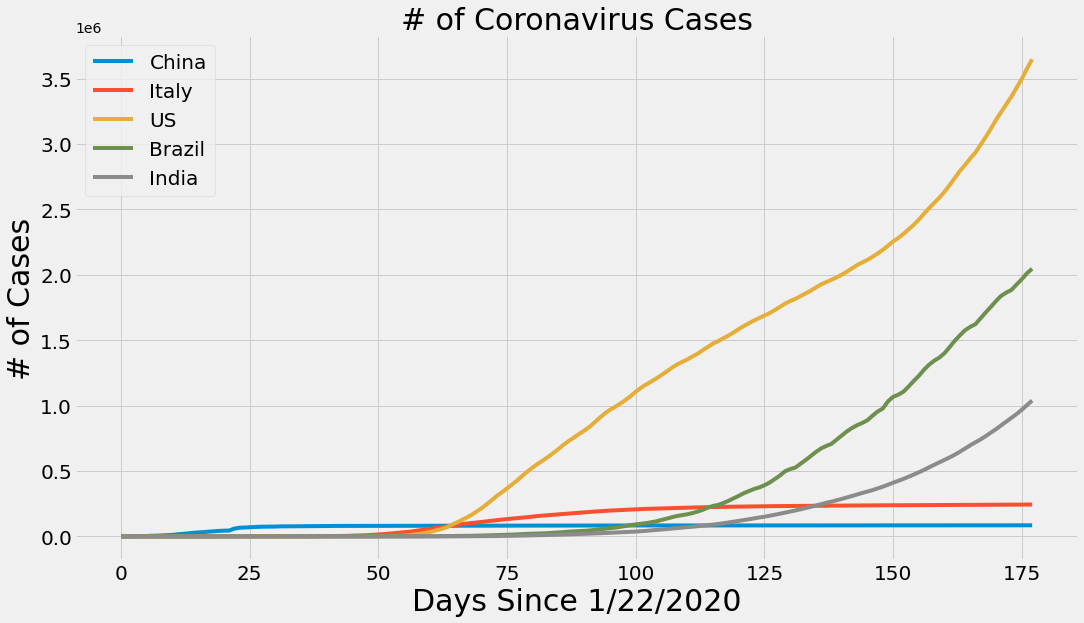

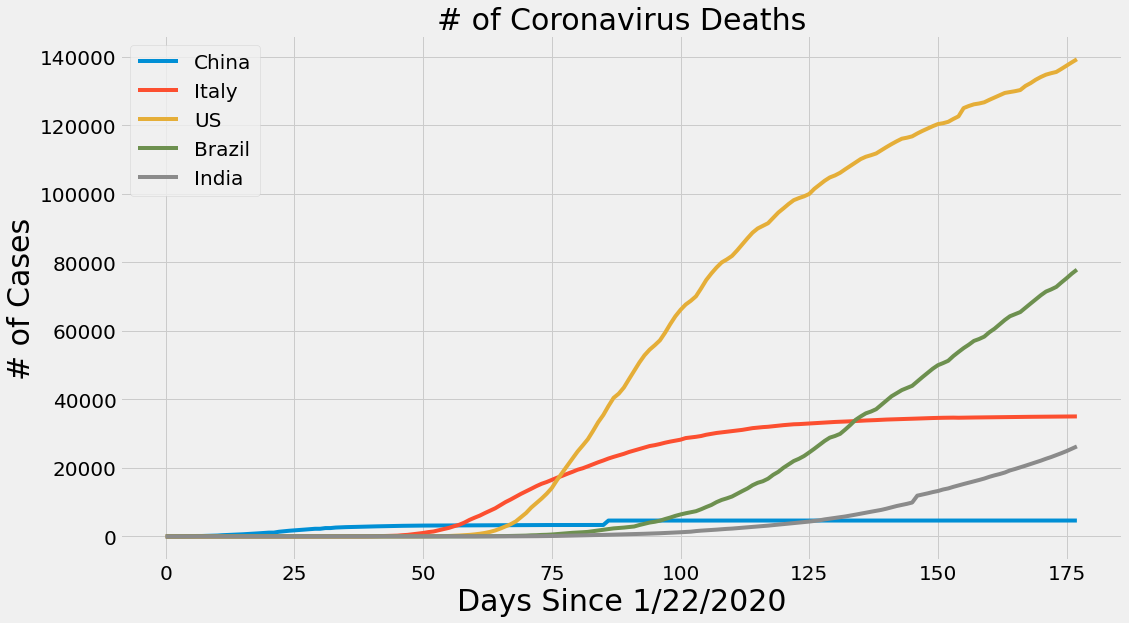

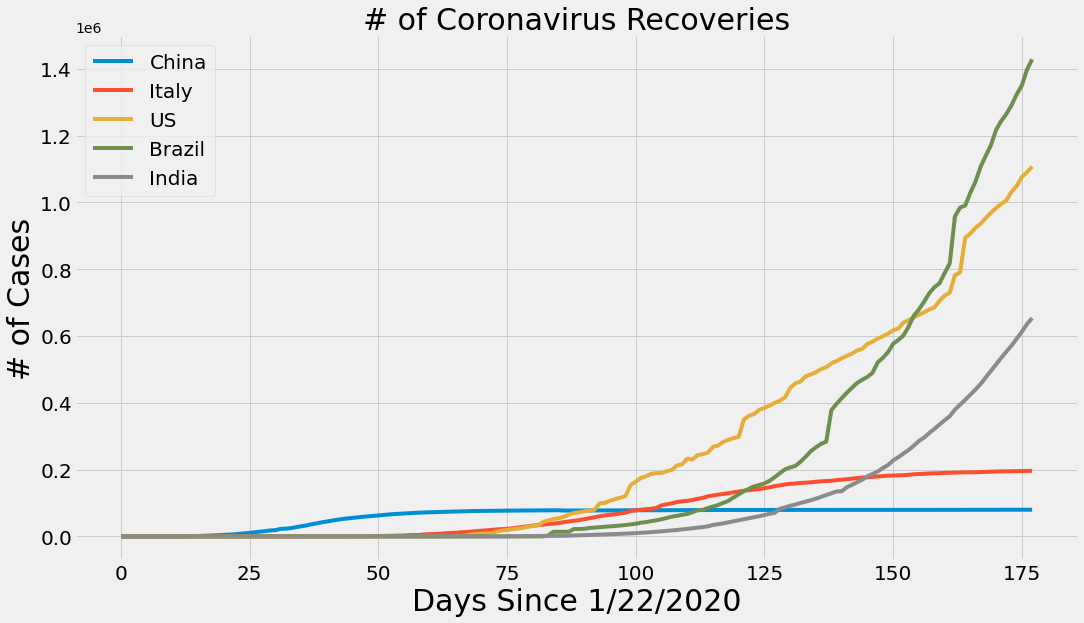

In [50]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, brazil_cases)
plt.plot(adjusted_dates, india_cases)

plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, brazil_deaths)
plt.plot(adjusted_dates, india_deaths)

plt.title('# of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, brazil_recoveries)
plt.plot(adjusted_dates, india_recoveries)

plt.title('# of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US','Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Model for predicting # of confirmed cases using Machine Learning . I am using Kernelized support vector machine(SVM), PloynomialFeature with Ridge regression and Decision Tree .
 <a id='world_wide_graphs'></a>

# Prediction of WORLD CASES using Kernelized support vector machine(SVM) output:
 <a id='world_wide_graphs'></a>


Training score:
0.9748949453028364

Test score:
0.9974497559599237


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



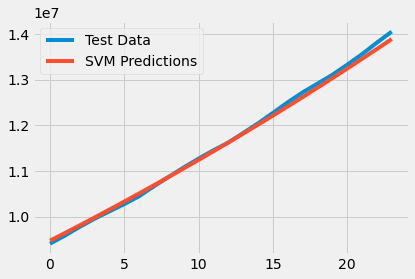

In [51]:
# Kernelized Support Vector Machine(SVM)

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[60:] , world_cases[60:] , test_size=0.20, shuffle=False) 

X_train_scaled = scaler.fit_transform(X_train_confirmed)
X_test_scaled = scaler.transform(X_test_confirmed)

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)


print("")
print("Training score:")
print(svm_confirmed.score(X_train_confirmed, y_train_confirmed))
print("")

print("Test score:")
print(svm_confirmed.score(X_test_confirmed, y_test_confirmed))

plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])




# Prediction of WORLD CASES using  PloynomialFeature with Ridge regression output:
 <a id='world_wide_graphs'></a>

Training score:
0.9999142504673255

Test score:
0.9850424712566502


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=4.47811e-19): result may not be accurate.



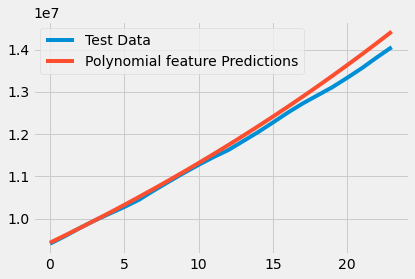

In [52]:
#Polynomial feature regression model prediction

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[60:] , world_cases[60:] , test_size=0.20, shuffle=False) 

poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

linreg = Ridge().fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linreg.predict(poly_X_test_confirmed)
linear_pred = linreg.predict(poly_future_forcast)

print("Training score:")
print(linreg.score(poly_X_train_confirmed, y_train_confirmed))
print("")
print("Test score:")
print(linreg.score(poly_X_test_confirmed, y_test_confirmed))

plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial feature Predictions'])


# Prediction of INDIAN CASES using PloynomialFeature with Ridge regression. 
 <a id='world_wide_graphs'></a>

Training score:
0.9999122199651325

Test score:
0.9971795148454188


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=3.05543e-23): result may not be accurate.



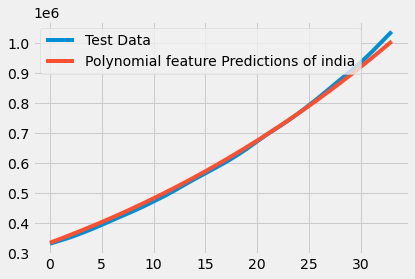

In [53]:
#Polynomial feature regression model prediction of india only

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(days_since_1_22[10:], india_new[10:] , test_size=0.20, shuffle=False) 

poly = PolynomialFeatures(degree=5)
poly1_X_train = poly.fit_transform(X_train)
poly1_X_test = poly.fit_transform(X_test)
poly1_future_forcast = poly.fit_transform(future_forcast)

linreg = Ridge().fit(poly1_X_train, y_train)
test1_linear_pred = linreg.predict(poly1_X_test)
linear1_pred = linreg.predict(poly1_future_forcast)

print("Training score:")
print(linreg.score(poly1_X_train, y_train))
print("")
print("Test score:")
print(linreg.score(poly1_X_test, y_test))

plt.plot(y_test)
plt.plot(test1_linear_pred)
plt.legend(['Test Data', 'Polynomial feature Predictions of india'])


In [54]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

Predictions for confirmed coronavirus cases worldwide

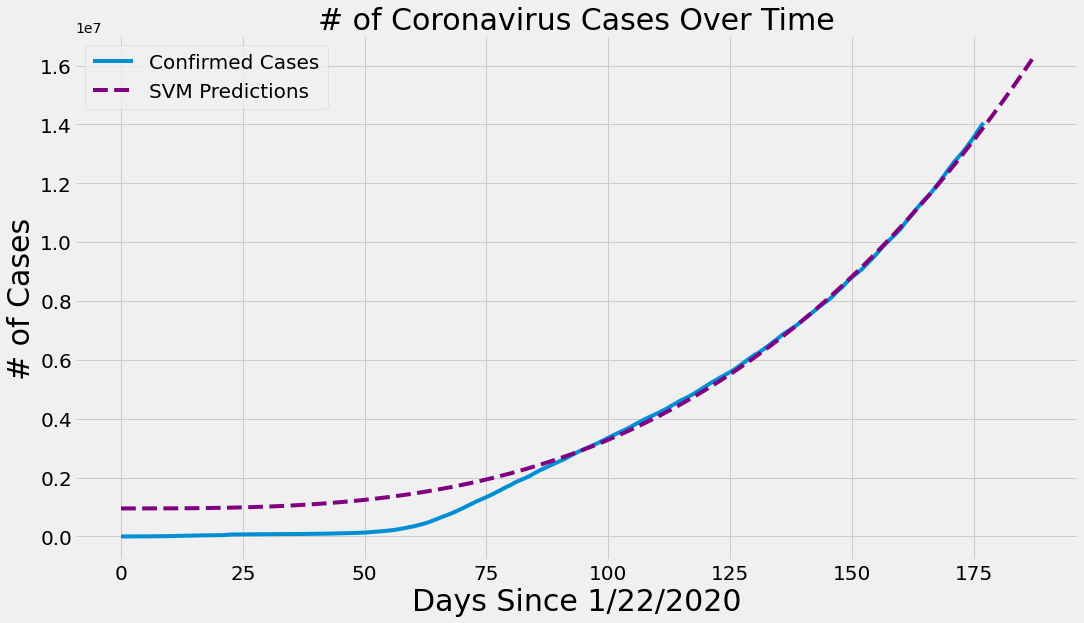

In [55]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

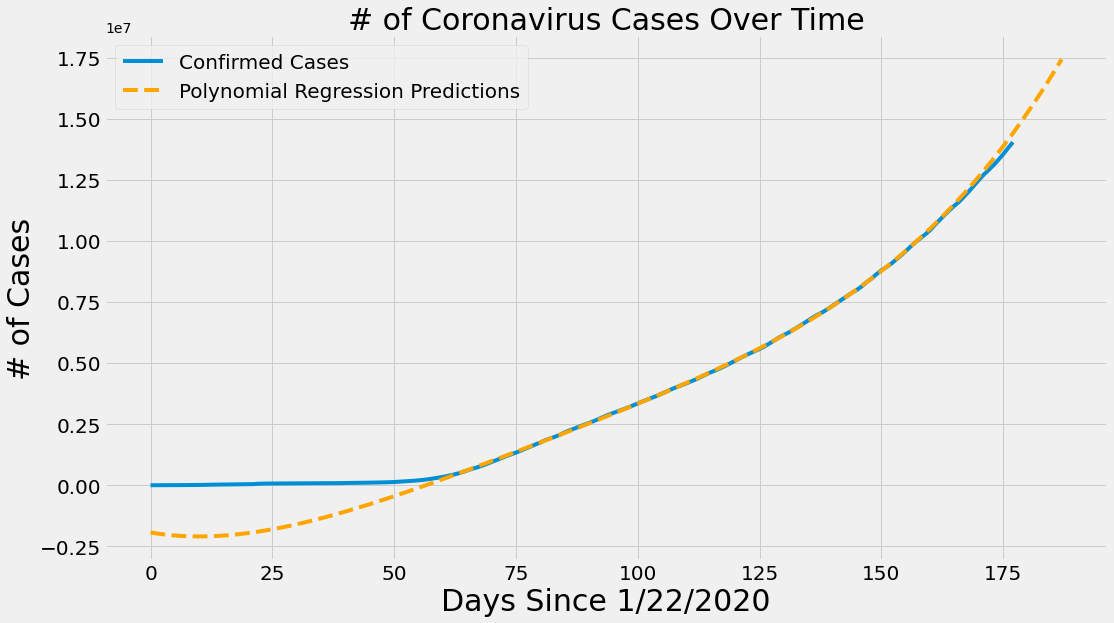

In [56]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

Predictions for confirmed coronavirus cases India

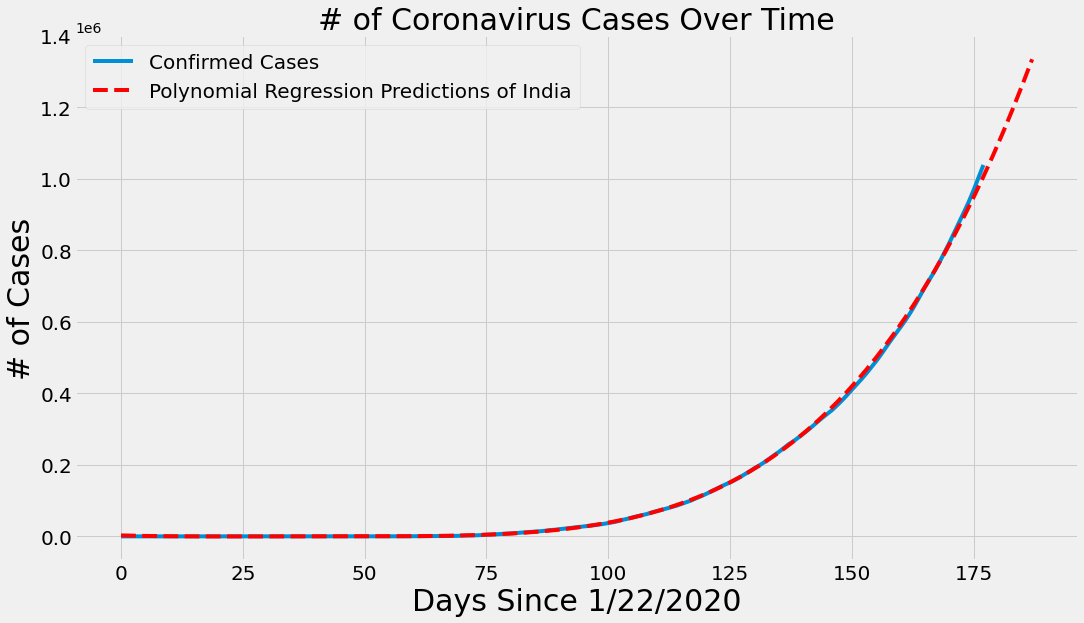

In [57]:
plot_predictions(adjusted_dates, india_new, linear1_pred, 'Polynomial Regression Predictions of India', 'red')

# Future predictions using SVM for next 10 days worldwide:

In [58]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

Date  SVM Predicted # of Confirmed Cases Worldwide
0  07/18/2020                                    14113323.0
1  07/19/2020                                    14336393.0
2  07/20/2020                                    14561969.0
3  07/21/2020                                    14790065.0
4  07/22/2020                                    15020695.0
5  07/23/2020                                    15253875.0
6  07/24/2020                                    15489616.0
7  07/25/2020                                    15727934.0
8  07/26/2020                                    15968842.0
9  07/27/2020                                    16212355.0

# Future predictions polynomial regression for next 10 days worldwide:

In [59]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
svm_df

Date  Polynomial Predicted # of Confirmed Cases Worldwide
0  07/18/2020                                         14698288.0  
1  07/19/2020                                         14979717.0  
2  07/20/2020                                         15267043.0  
3  07/21/2020                                         15560382.0  
4  07/22/2020                                         15859852.0  
5  07/23/2020                                         16165569.0  
6  07/24/2020                                         16477652.0  
7  07/25/2020                                         16796223.0  
8  07/26/2020                                         17121402.0  
9  07/27/2020                                         17453313.0

# Future predictions using ploynomialfeature for next 10 days India:

In [60]:
# Future predictions using polynomial regression of india
linear1_pred = linear1_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases India': np.round(linear1_pred[-10:])})
svm_df

Date  Polynomial Predicted # of Confirmed Cases India
0  07/18/2020                                        1036291.0
1  07/19/2020                                        1066670.0
2  07/20/2020                                        1097721.0
3  07/21/2020                                        1129451.0
4  07/22/2020                                        1161872.0
5  07/23/2020                                        1194995.0
6  07/24/2020                                        1228828.0
7  07/25/2020                                        1263383.0
8  07/26/2020                                        1298670.0
9  07/27/2020                                        1334700.0

# Mortality rate:

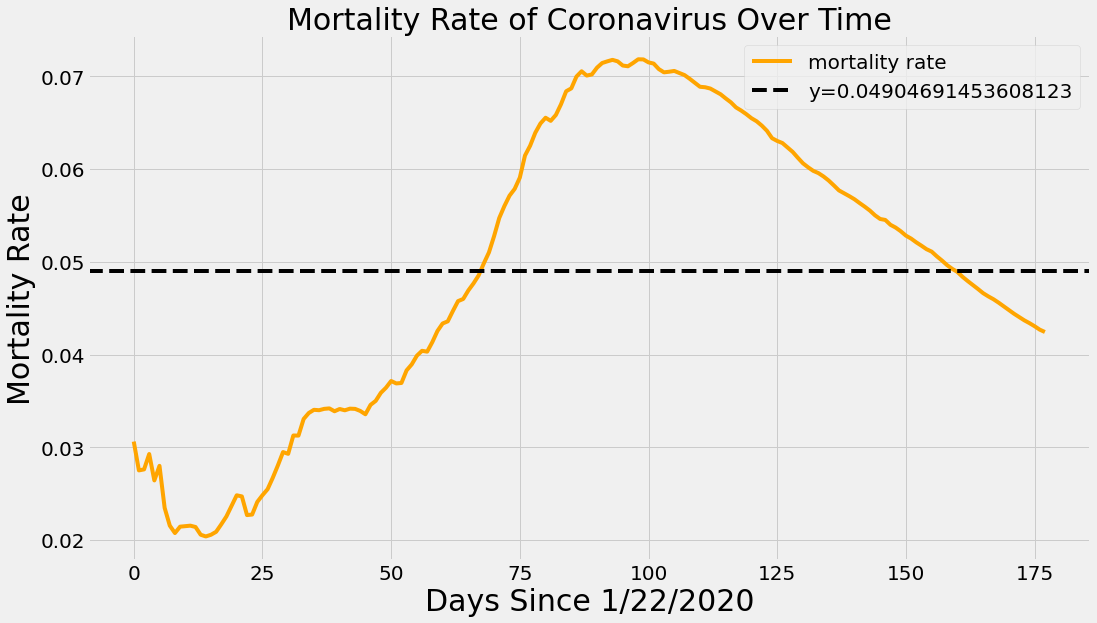

In [61]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Recovery rate:

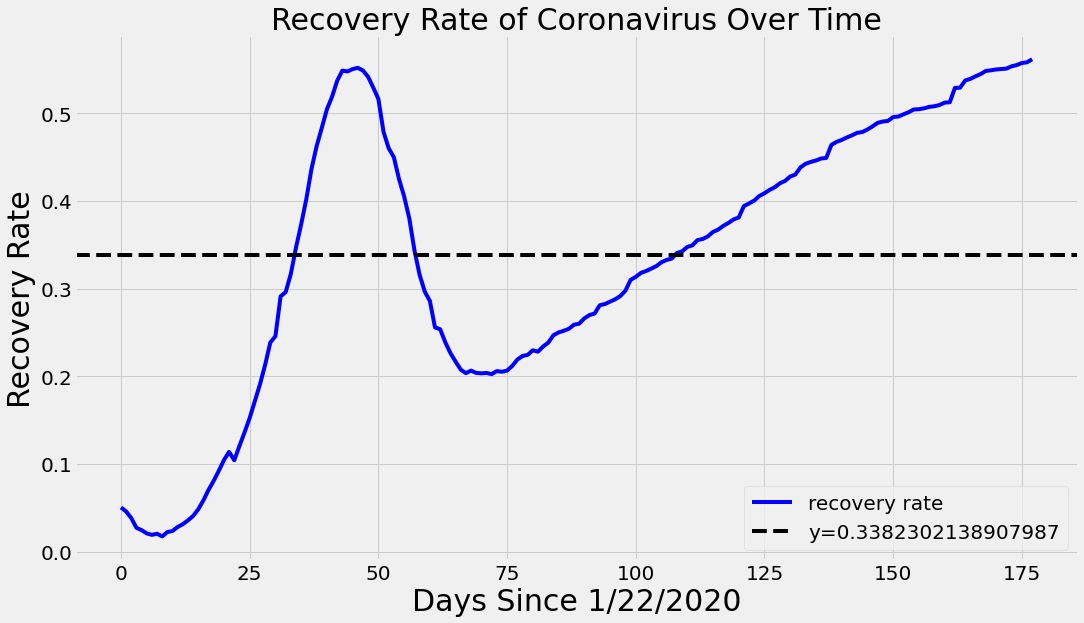

In [62]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Death vs Recovery :

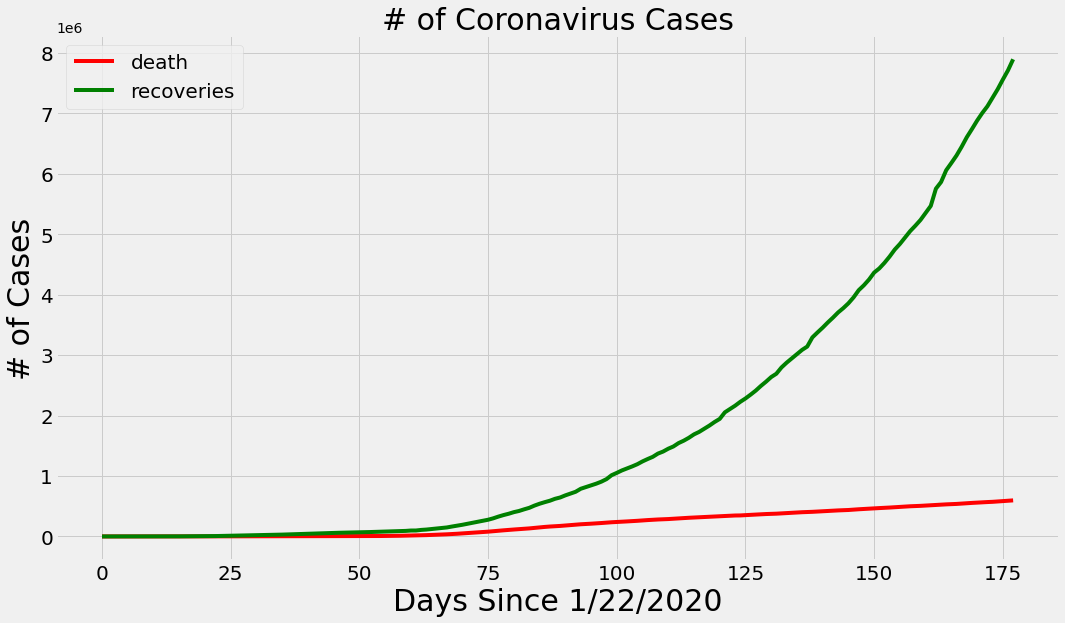

In [63]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [64]:
unique_countries =  list(latest_data['Country_Region'].unique())
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

# Coronavirus data country wise:

In [65]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

In [66]:
# Only show 15 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[15:])

for i in range(len(country_confirmed_cases[:15])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

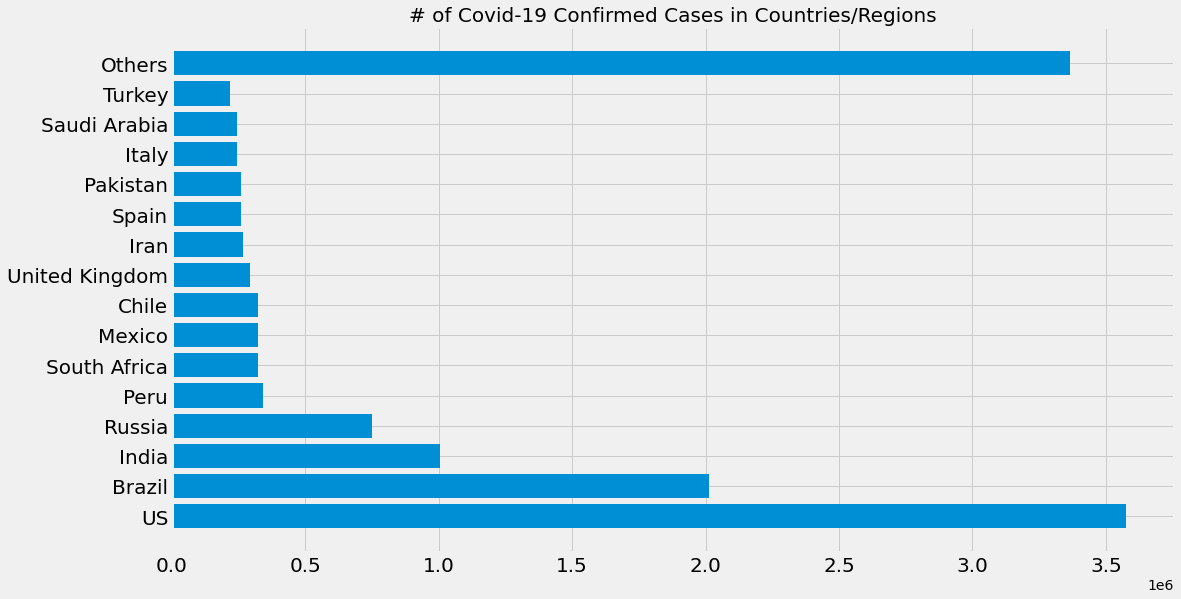

In [67]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

In [68]:
import random
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

# Covid19 confirmed cases per country:

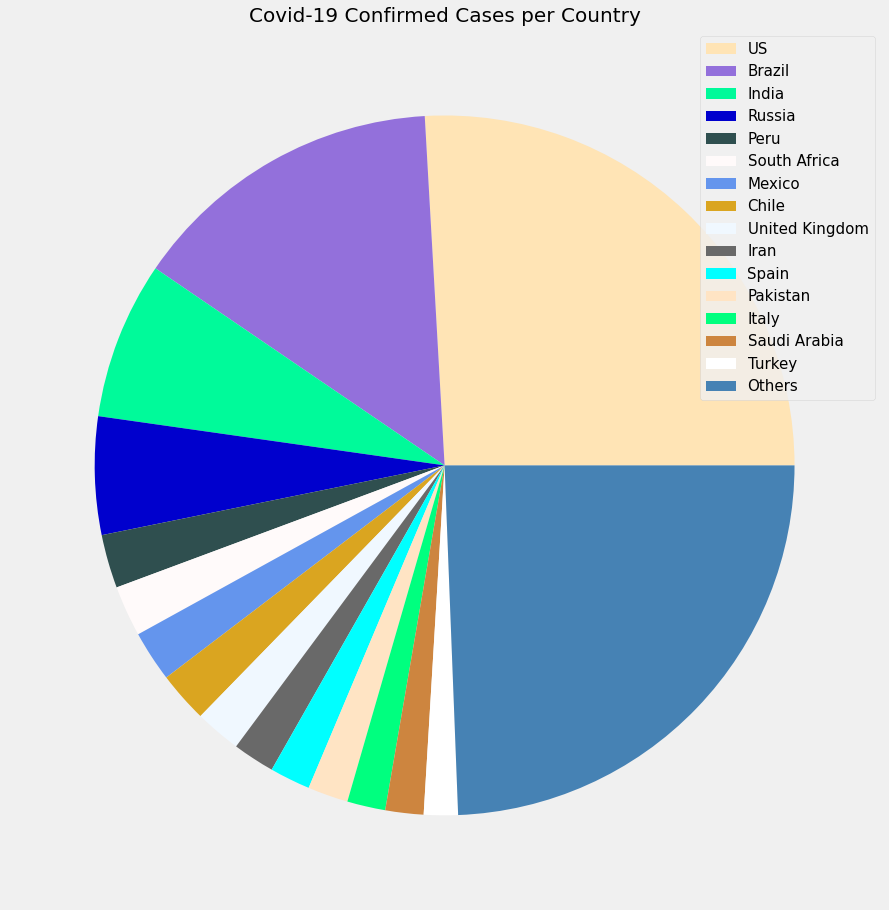

In [70]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

<font face = "Verdana" size ="5">PROTECTIVE MEASUREMENT</font><br><br>
<li>It is very necessity to wash frequently your hands for 20 seconds with cleanser and water or alcohol founded scrub.</li>
<li>We need to our face with disposable face mask.</li>
<li>We need to avoid close contact (1 m) from those peoples who have effected by corona virus</li>  
<li>We need to not touch face if our hands are not hygienic.</li><br><br>

<font face = "Verdana" size ="1">
<center><img src='https://media.istockphoto.com/vectors/coronavirus-virus-prevention-line-icons-vector-illustration-include-vector-id1220111368' width="600" height="600">
</center> 
</font>


<font face = "Verdana" size ="5">TREATMENTS</font><br><br>
<font face = "Verdana" size ="3">There are currently no vaccine for Corona virus but according to my point of view we can cure the Corona diseases by using some plants. <br>If you find coronal diseases in yourself then you easily cure this diseases by using some plants.<br>
Practically I have proved that by using these plants to control Pneumonia diseases.<br><br>
    
<font face = "Verdana" size ="1">
<center><img src='https://cdn.pixabay.com/photo/2020/04/22/10/29/call-5077271_1280.jpg' width="900" height="900">
</center> 
</font>
